In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib import colors
from matplotlib import cm
from matplotlib import rcParams

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'font.family': 'sans-serif',
         'font.sans-serif': 'Arial',
         'font.size': 12,
         'text.usetex': True}
rcParams.update(params)

# Importing necessary functions
import cont_phen_solver as cps

In [7]:
def const_test2(x,y,z):
    return np.ones((len(z), 1))

#inc prolif inc movement 2rho/K-D
def hphm(x,y,z):
    here = Dy*((2/umax)*solver.fun_local_mass(x)-1)
    #build the right shape
    out = np.zeros((x.shape[0], z.shape[0]))
    for i in range(z.shape[0]):
        out[:,i] = here
    return out

def hehm(x,y,z):
    here = Dy*(2*y-1)
    #build the right shape
    out = np.zeros((x.shape[0], z.shape[0]))
    for i in range(z.shape[0]):
        out[:,i] = here
    return out

def hshp(x,y,z):
    here = Dy*(2*(solver.fun_local_mass(x)+y)-1)
    #build the right shape
    out = np.zeros((x.shape[0], z.shape[0]))
    for i in range(z.shape[0]):
        out[:,i] = here
    return out

/var/folders/vb/cz4pzhrx05vfycqcv7fzb8_00000gn/T/ipykernel_62877/3507862845.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


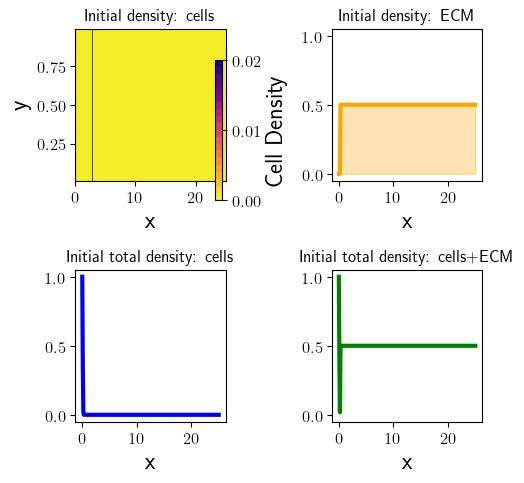

In [8]:
# Define your parameters
Nx=250
Ny=50

#Model params - ND model - set these to 0
Dx=1
r=1
umax=1
deg=1 #no ECM degradation

#no phenotypic drift
Dy = 1
v= 1 #default to start

dt=0.1
tmax=30

xmin=0
xmax=25
ymin=0
ymax=1

dens_i1 = 1
dens_i2 = 0.5


solver = cps.solver(Nx, Ny, dt, tmax, Dx, Dy, r, umax, deg, v, xmin, xmax, ymin, ymax)

# Assuming solver.zmean and solver.spx are defined
[Z, X] = np.meshgrid(solver.ymean, solver.spx)


# Define the initial condition
u0 = 0.1 * (np.exp(-(X)**2 * 100) / np.sqrt(np.pi / 100))

# Normalize u0 so that the sum of each column is <= 1
column_sums = solver.fun_local_mass(u0)
nc = np.max(column_sums)
u0_normalized = u0 / nc

init_rho_1 = u0_normalized

# Initialize rho2 as a 1D array, since it varies only in the x direction
init_rho_2 = dens_i2 * np.ones(len(solver.spx))
# Subtract the initial density of cells from ECM density where cells are present
init_rho_1_sum = solver.fun_local_mass(init_rho_1)
for j in range(len(solver.spx)):
    if init_rho_1_sum[j] > 0.001:
    #np.any(init_rho_1[:, j] > 10e-2):
        init_rho_2[j] = 0
        
init_rho_1_max = np.max(init_rho_1)

# Plotting the initial conditions
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

#Calculate the sum of the cell densities
init_rho_1_sum = solver.fun_local_mass(init_rho_1)

# Cell density
c1 = ax[0,0].contourf(X, Z, init_rho_1, levels=np.linspace(0, init_rho_1_max, 21), cmap='plasma_r')
ax[0,0].contour(X, Z, init_rho_1, [0], linewidths=0.5, colors='k') 
ax[0,0].set_title('Initial density: cells')
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')

# ECM density
ax[0,1].plot(solver.spx, init_rho_2, color='orange', linewidth=3)
ax[0,1].fill_between(solver.spx, 0, init_rho_2, color='orange', alpha=0.3)
ax[0,1].set_title('Initial density: ECM')
ax[0,1].set_xlabel('x')
ax[0,1].set_ylim(-0.05, umax+0.05)

#sum of cel  densities to check 
ax[1,0].plot(solver.spx, init_rho_1_sum, color='blue', linewidth=3)
ax[1,0].set_title('Initial total density: cells')
ax[1,0].set_xlabel('x')
ax[1,0].set_ylim(-0.05, umax+0.05)

#sum of densities to check 
ax[1,1].plot(solver.spx, init_rho_2+init_rho_1_sum, color='green', linewidth=3)
ax[1,1].set_title('Initial total density: cells+ECM')
ax[1,1].set_xlabel('x')
ax[1,1].set_ylim(-0.05, umax+0.05)

cbar = fig.colorbar(c1, ax=[ax[0,0], ax[0,1]], location='right', anchor=(0.4,0.75), label = r'Cell Density', fraction=1, shrink=0.8) #'difference in numerically estimated wave speed')
cbar.set_ticks([0, init_rho_1_max/2, init_rho_1_max])

plt.tight_layout()
plt.show()

/var/folders/vb/cz4pzhrx05vfycqcv7fzb8_00000gn/T/ipykernel_62877/3277008714.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', Ny)  # Create a colormap with the number of phenotypes


Maximum time = 50.00
Finished: t = 50.10
Maximum time = 50.00
Finished: t = 50.10
Maximum time = 50.00
Finished: t = 50.10


/var/folders/vb/cz4pzhrx05vfycqcv7fzb8_00000gn/T/ipykernel_62877/3277008714.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make room for the color bar


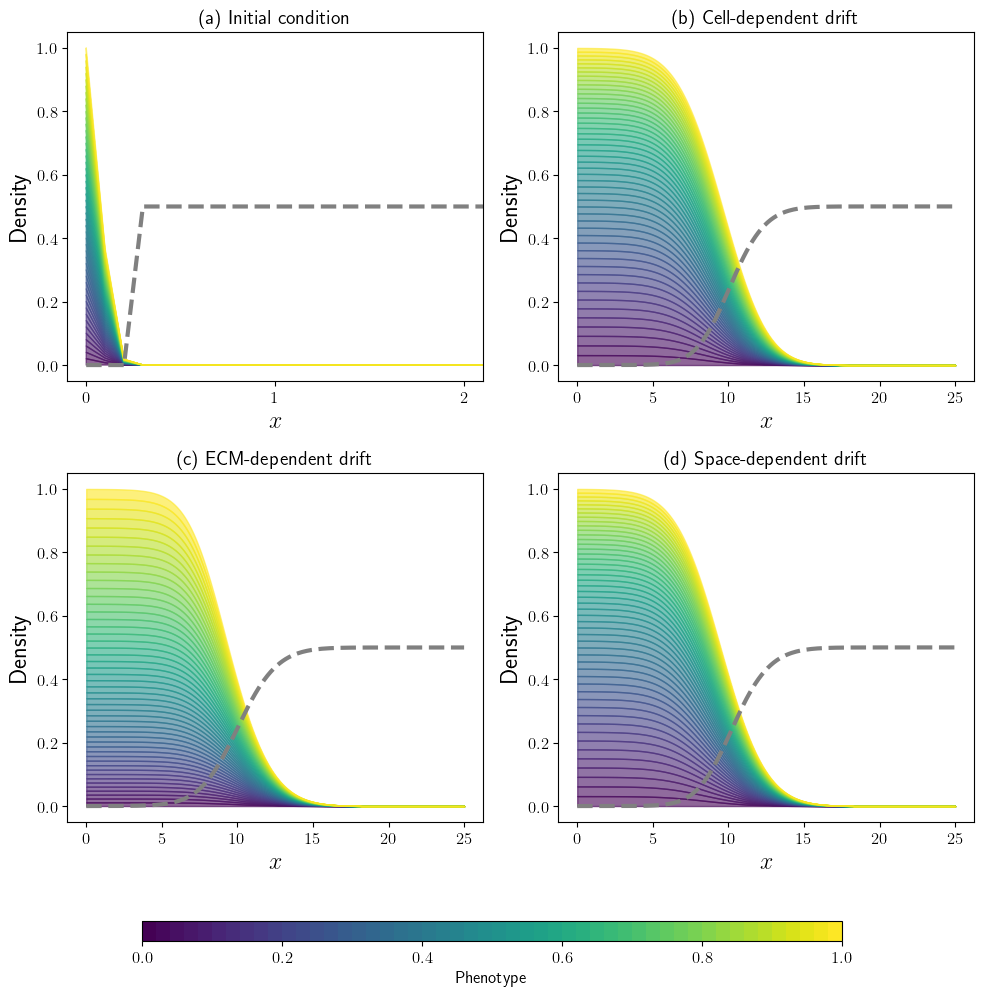

In [9]:
dt = 0.1

funcs = [hphm, hehm, hshp]

mean_y_values = []
tmax=50
plot_pts = [30]  # times to plot
indexes = [int(pt/dt) for pt in plot_pts]  # indexes for plotting times

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()  # Flatten to easily loop over

# Create a colormap
cmap = cm.get_cmap('viridis', Ny)  # Create a colormap with the number of phenotypes
norm = colors.Normalize(vmin=0, vmax=1)  # Normalize the color bar to range between 0 and 1

for i in range(len(funcs)):
    j = i + 1
    solver = cps.solver(Nx, Ny, dt, tmax, Dx, Dy, r, umax, deg, v, xmin, xmax, ymin, ymax)

    solver.set_ICs(init_rho_1, init_rho_2)
    solver.set_diffusion_fct_y([const_test2])
    solver.set_advection_fct_y([funcs[i]])
    rho1, rho2 = solver.solve()

    rho1_array = np.array(rho1)
    rho2_array = np.array(rho2)  # Apply the condition and create new variables

    rho1_new = np.where(rho1_array < 1e-5, 0, rho1_array)
    rho2_new = np.where(rho2_array < 1e-5, 0, rho2_array)  # Calculate the mean y value at each x point

    cumulative_density = np.zeros_like(solver.spx)
    for k in range(Ny):  # Loop over phenotypes
        color = cmap(k / (Ny - 1))
        ax[j].fill_between(solver.spx, cumulative_density, cumulative_density + rho1_new[indexes[0], :, k], color=color, alpha=0.6)
        cumulative_density += rho1_new[indexes[0], :, k]

    ax[j].set_title(f't= {plot_pts[0]}', fontsize=14)
    ax[j].set_xlabel('$x$')
    ax[j].set_ylabel('Density')
    ax[j].plot(solver.spx, rho2_new[indexes[0], :], color='grey', linewidth=3, linestyle='dashed')

# Add a single color bar to the figure
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Phenotype', fontsize=12)

cumulative_density = np.zeros_like(solver.spx)
ax[0].set_ylabel('Density')  # label y axis for rho1
ax[0].set_xlabel('$x$')
ax[0].set_title(f't= 0', fontsize=14)
ax[0].set_xlim(-.1, 2.1)
ax[0].set_xticks([0, 1, 2])
ax[0].plot(solver.spx, init_rho_2, color='grey', linewidth=3, linestyle='dashed')
for k in range(Ny):  # Loop over phenotypes
        color = cmap(k / (Ny - 1))
        ax[0].fill_between(solver.spx, cumulative_density, cumulative_density + rho1_new[0, :, k], color=color, alpha=0.6)
        cumulative_density += rho1_new[0, :, k]

titles = ['(a) Initial condition', '(b) Cell-dependent drift', '(c) ECM-dependent drift', '(d) Space-dependent drift']
for i in range(len(titles)):
    ax[i].set_title(titles[i], fontsize=14)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make room for the color bar

plt.savefig('figs/gg_ecm.pdf', format = 'pdf', dpi=300, bbox_inches='tight')  
plt.savefig('figs/gg_ecm_.svg', format = 'svg', dpi=300, bbox_inches='tight')
plt.savefig('figs/gg_ecm.png', format = 'png', dpi=300, bbox_inches='tight')  
plt.show()

/var/folders/vb/cz4pzhrx05vfycqcv7fzb8_00000gn/T/ipykernel_62877/1820992363.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', Ny)  # Create a colormap with the number of phenotypes


Maximum time = 50.00
Finished: t = 50.10
Maximum time = 50.00
Finished: t = 50.10


/var/folders/vb/cz4pzhrx05vfycqcv7fzb8_00000gn/T/ipykernel_62877/1820992363.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make room for the color bar


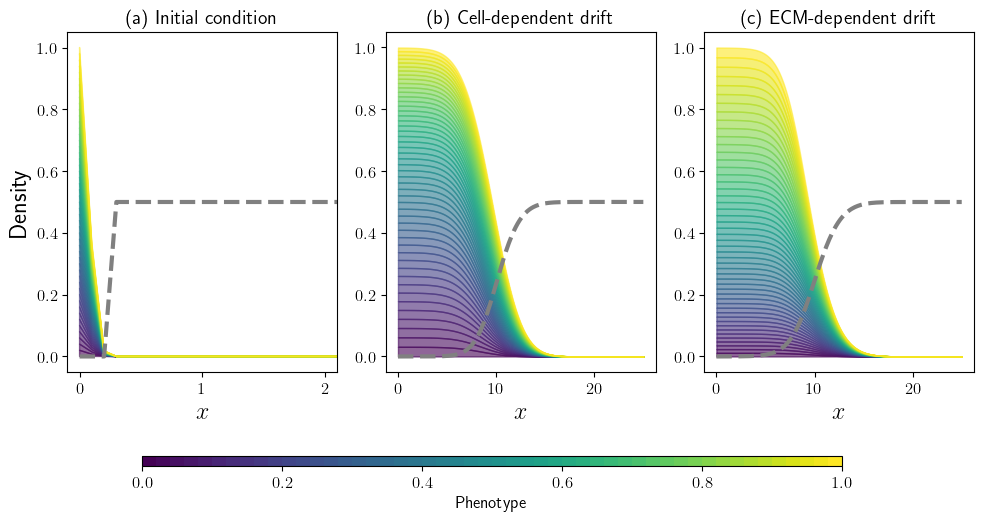

In [10]:
dt = 0.1

funcs = [hphm, hehm]

mean_y_values = []
tmax=50
plot_pts = [30]  # times to plot
indexes = [int(pt/dt) for pt in plot_pts]  # indexes for plotting times

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax = ax.flatten()  # Flatten to easily loop over

# Create a colormap
cmap = cm.get_cmap('viridis', Ny)  # Create a colormap with the number of phenotypes
norm = colors.Normalize(vmin=0, vmax=1)  # Normalize the color bar to range between 0 and 1

for i in range(len(funcs)):
    j = i + 1
    solver = cps.solver(Nx, Ny, dt, tmax, Dx, Dy, r, umax, deg, v, xmin, xmax, ymin, ymax)

    solver.set_ICs(init_rho_1, init_rho_2)
    solver.set_diffusion_fct_y([const_test2])
    solver.set_advection_fct_y([funcs[i]])
    rho1, rho2 = solver.solve()

    rho1_array = np.array(rho1)
    rho2_array = np.array(rho2)  # Apply the condition and create new variables

    rho1_new = np.where(rho1_array < 1e-5, 0, rho1_array)
    rho2_new = np.where(rho2_array < 1e-5, 0, rho2_array)  # Calculate the mean y value at each x point

    cumulative_density = np.zeros_like(solver.spx)
    for k in range(Ny):  # Loop over phenotypes
        color = cmap(k / (Ny - 1))
        ax[j].fill_between(solver.spx, cumulative_density, cumulative_density + rho1_new[indexes[0], :, k], color=color, alpha=0.6)
        cumulative_density += rho1_new[indexes[0], :, k]

    ax[j].set_title(f't= {plot_pts[0]}', fontsize=14)
    ax[j].set_xlabel('$x$')
    # ax[j].set_ylabel('Density')
    ax[j].plot(solver.spx, rho2_new[indexes[0], :], color='grey', linewidth=3, linestyle='dashed')

# Add a single color bar to the figure
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Phenotype', fontsize=12)

cumulative_density = np.zeros_like(solver.spx)
ax[0].set_ylabel('Density')  # label y axis for rho1
ax[0].set_xlabel('$x$')
ax[0].set_title(f't= 0', fontsize=14)
ax[0].set_xlim(-.1, 2.1)
ax[0].set_xticks([0, 1, 2])
ax[0].plot(solver.spx, init_rho_2, color='grey', linewidth=3, linestyle='dashed')
for k in range(Ny):  # Loop over phenotypes
        color = cmap(k / (Ny - 1))
        ax[0].fill_between(solver.spx, cumulative_density, cumulative_density + rho1_new[0, :, k], color=color, alpha=0.6)
        cumulative_density += rho1_new[0, :, k]

titles = ['(a) Initial condition', '(b) Cell-dependent drift', '(c) ECM-dependent drift']
for i in range(len(titles)):
    ax[i].set_title(titles[i], fontsize=14)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make room for the color bar

plt.savefig('figs/gg_ecm3.pdf', format = 'pdf', dpi=300, bbox_inches='tight')  
plt.savefig('figs/gg_ecm3.svg', format = 'svg', dpi=300, bbox_inches='tight')
plt.savefig('figs/gg_ecm3.png', format = 'png', dpi=300, bbox_inches='tight')  
plt.show()